# Data Analysis on Heart Disease

## Introduction
Heart diseases are one of the leading causes of death in the world including the United States for many years. With the increasing rate of cases for heart diseases worldwide, it is important to focus at the leading causes of this disease and establish a relationship between these vicious disease. As a base for our analysis we are going to use the heart disease dataset available at Kaggle. 
(https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data)

This is the cleaned version of the data set given in Canvas -> group_project_proposal


The dataset originates from 1988 and evaluates data from four different databases: Cleveland, Hungary, Switzerland and Long Beach V. While the dataset does have 76 distinct attributes, it only utilizes 14 of them. In our group project, we chose to focus on the variables age, resting blood pressure, cholesterol, and  maximum heart rate and compere it to the diagnosis of heart disease. We chose this variables since according to National Center for Chronic Disease Prevention and Health Promotion (NCCDPHP) it is considered one of the leading reason of causing the heart disease. We will be comparing the numerical variables by the categorical variables (2 cases) “0” and “1” which shows the diagnosis of heart diseases. 

From thee following informations, we will be attempting to answer the following predictive question. 

**Predictive question:**
How does the amount of cholesterol, type of heart defect, age, and sex help us predict the diagnosis of heart disease?

We will be conducting a KNN classification in order to answer the predictive question.

In [1]:
### Run this cell before continuing.
install.packages("kknn")
library(kknn)
library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr)
library(ggplot2)
options(repr.matrix.max.rows = 10)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks strin

### Reading the Data

First read the raw data from GitHub that we uploaded.

In [2]:
heart_disease_data <- read_csv("https://raw.githubusercontent.com/yma24ma/dsci_009_43_gp/main/heart.csv")
heart_disease_data

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
47,1,0,110,275,0,0,118,1,1.0,1,1,2,0


**Variables**

age: Age

sex: Sex

cp: Chest pain type (4 values)

trestbps: resting blood pressure

chol: serum cholestoral in mg/dl

fbs: fasting blood sugar > 120 mg/dl

restecg: resting electrocardiographic results (values 0,1,2)

thalacg: maximum heart rate achieved

exang: exercise induced angina

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

target: diagnosis of heart disease

**Select Data**

We will now be using the `select()` function to select the row that we will be using in this analysis and make it into one table.

In [3]:
heart_disease_selected <- select(heart_disease_data, age, chol, target, thalach, trestbps)|>
                          mutate(target=as_factor(target))|>
                          mutate(heart_disease=fct_recode(target, "Yes" = "1", "No " = "0"))
heart_disease_selected

age,chol,target,thalach,trestbps,heart_disease
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>
52,212,0,168,125,No
53,203,0,155,140,No
70,174,0,125,145,No
61,203,0,161,148,No
62,294,0,106,138,No
⋮,⋮,⋮,⋮,⋮,⋮
59,221,1,164,140,Yes
60,258,0,141,125,No
47,275,0,118,110,No


We use the sum function to check if there are any NA values in our data tables

In [4]:
sum(is.na(heart_disease_selected))

[1] 0

**Average of Selected**

In [5]:
hd_average1 <- heart_disease_selected |>
                map(mean) 
hd_average1

Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”


$age
[1] 54.43415

$chol
[1] 246

$target
[1] NA

$thalach
[1] 149.1141

$trestbps
[1] 131.6117

$heart_disease
[1] NA

## Visualization
Now we will visualize the relationship between each numerical variable vs the heart disease.

**Age vs Cholesterol**

Now, we will visualize the relationship between the age and the cholesterol. First, we will be using `select` function to create a table.

In [38]:
hd_select_chol <- select(heart_disease_selected,age,chol,heart_disease)|>
               mutate(heart_disease)
hd_select_chol

age,chol,heart_disease
<dbl>,<dbl>,<fct>
52,212,No
53,203,No
70,174,No
61,203,No
62,294,No
⋮,⋮,⋮
59,221,Yes
60,258,No
47,275,No


Now use `ggplot` to create a scatter plot with the `age` on the x-axis and `chol` on the y-axis.

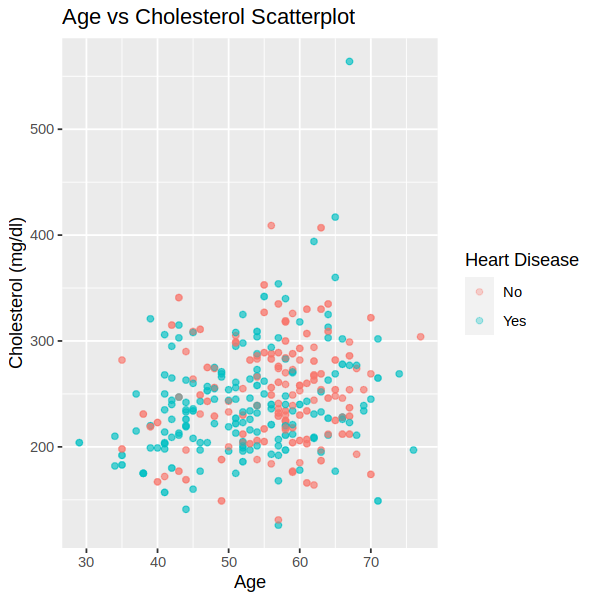

In [36]:
hd_chol_plot <- ggplot(hd_age_chol,aes(x = age, y = chol,colour = heart_disease)) +
                    geom_point(alpha = 0.3) +
                    labs(x = "Age", y = "Cholesterol (mg/dl)", colour = "Heart Disease") +       
                    ggtitle("Age vs Cholesterol Scatterplot")
hd_chol_plot   

In [39]:
hd_select_thalach <- select(heart_disease_selected,age,thalach,heart_disease)|>
                  mutate(heart_disease)
hd_select_thalach

age,thalach,heart_disease
<dbl>,<dbl>,<fct>
52,168,No
53,155,No
70,125,No
61,161,No
62,106,No
⋮,⋮,⋮
59,164,Yes
60,141,No
47,118,No


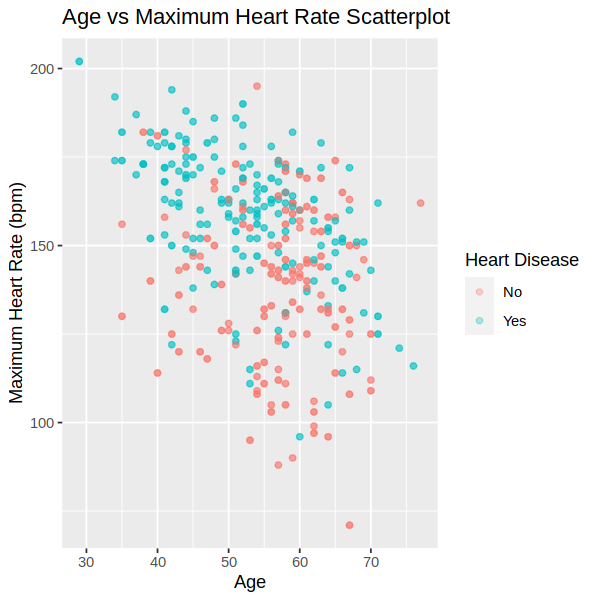

In [34]:
hd_thalach_plot <- ggplot(hd_age_thalach,aes(x = age, y = thalach, colour = heart_disease)) +
                       geom_point(alpha = 0.3)+
                       labs(x = "Age", y= "Maximum Heart Rate (bpm)", colour = "Heart Disease") +       
                       ggtitle("Age vs Maximum Heart Rate Scatterplot")
hd_thalach_plot   

In [40]:
hd_select_trestbps <- select(heart_disease_selected,age,trestbps,heart_disease)|>
                   mutate(heart_disease)
hd_select_trestbps

age,trestbps,heart_disease
<dbl>,<dbl>,<fct>
52,125,No
53,140,No
70,145,No
61,148,No
62,138,No
⋮,⋮,⋮
59,140,Yes
60,125,No
47,110,No


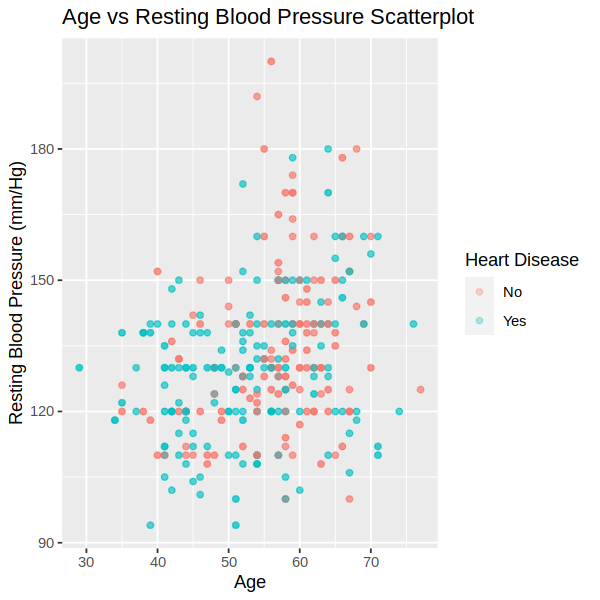

In [54]:
hd_trestbps_plot <- ggplot(hd_age_trestbps,aes(x = age, y = trestbps, colour = heart_disease)) +
                        geom_point(alpha = 0.3) +
                        labs(x = "Age", y = "Resting Blood Pressure (mm/Hg)", colour = "Heart Disease") +       
                        ggtitle("Age vs Resting Blood Pressure Scatterplot")
hd_trestbps_plot   

## Methods
For our Heart Disease data set, we are going to use the method of K-nearest neighbors classification. Essentially, we are going to use predictor variables chol (amount of cholesterol), thal (type of heart defect), age and sex to predict the diagnosis class of heart disease, which can be categorized into 0 (no heart disease) or 1 (heart disease). Therefore, the column names we will incorporate are chol, thal, age, sex and target. We chose to only use four predictor variables because we think that there are more than two factors that contribute to the diagnosis of heart disease. Since there are multivariables, we can avoid a 4D graph by using the facet_grid function to create a plot that has multiple subplots arranged in a grid.

## Expected outcomes and significance


What do you expect to find?

We expect to identify the most relevant features that contribute to the presence or absence of heart disease.We also look for patterns and correlations within the data.

What impact could such findings have?

Understanding the factors that contribute to heart disease can inform public health initiatives.Furthermore, discoveries from this dataset can enhance healthcare by improving diagnostic tools and predictive models for heart disease, potentially leading to early detection and treatment.

What future questions could this lead to?

Are there additional attributes that should be considered, or are there redundant variables that can be eliminated to improve model performance?



In [24]:
set.seed(9999) 
heart_disease_recipe <- recipe(heart_disease ~ age + chol + thalach + trestbps, data = heart_disease_selected) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())
heart_disease_recipe
                        
heart_disease_scaled <- heart_disease_recipe |>  
                        prep() |> 
                        bake(heart_disease_selected)
heart_disease_scaled

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Operations:

Scaling for all_predictors()
Centering for all_predictors()

age,chol,thalach,trestbps,heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-0.2683056,-0.6590104,0.8209198,-0.3774513,No
-0.1580799,-0.8334543,0.2558430,0.4788735,No
1.7157579,-1.3955514,-1.0481803,0.7643151,No
0.7237261,-0.8334543,0.5166477,0.9355801,No
0.8339519,0.9303676,-1.8740617,0.3646969,No
⋮,⋮,⋮,⋮,⋮
0.50327465,-0.4845665,0.6470500,0.4788735,Yes
0.61350040,0.2325919,-0.3527012,-0.3774513,No
-0.81943436,0.5620971,-1.3524524,-1.2337761,No


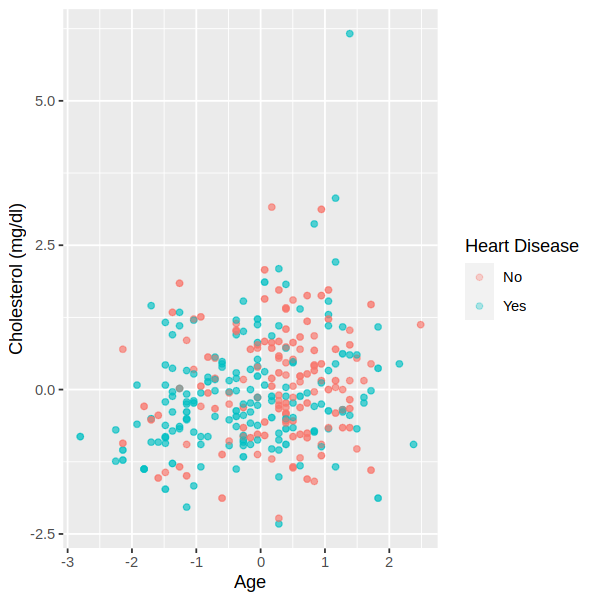

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)


hd_chol_scaled_plot <- ggplot(heart_disease_scaled, aes(x = age, y = chol, color = heart_disease)) +
geom_point(alpha = 0.3) +
labs(x = "Age", y = "Cholesterol (mg/dl)", colour = "Heart Disease")
hd_chol_scaled_plot

hd_maxheart_scaled_plot <- ggplot(heart_disease_scaled, aes(x = age, y = thalach, color = heart_disease)) +
geom_point(alpha = 0.3) +
labs(x = "Age", y = "Max Heart Rate (bpm)", colour = "Heart Disease")
hd_maxheart_scaled_plot

hd_trestbps_scaled_plot <- ggplot(heart_disease_scaled, aes(x = age, y = trestbps, color = heart_disease)) +
geom_point(alpha = 0.3) +
labs(x = "Age", y = "Resting Blood Pressure (mm/Hg)", colour = "Heart Disease")
hd_trestbps_scaled_plot

In [14]:
split_set <- initial_split(heart_disease_selected, prop = 0.75, strata =heart_disease)  
training_set <- training(split_set)   
testing_set <- testing(split_set)
testing_set
training_set

age,chol,target,thalach,trestbps,heart_disease
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>
58,248,1,122,100,Yes
58,318,0,140,114,No
71,149,1,125,112,Yes
43,341,0,136,132,No
51,308,1,142,140,Yes
⋮,⋮,⋮,⋮,⋮,⋮
42,295,1,162,120,Yes
58,318,0,140,114,No
65,282,0,174,138,No


age,chol,target,thalach,trestbps,heart_disease
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>
52,212,0,168,125,No
53,203,0,155,140,No
70,174,0,125,145,No
61,203,0,161,148,No
62,294,0,106,138,No
⋮,⋮,⋮,⋮,⋮,⋮
56,193,1,162,120,Yes
45,308,1,170,128,Yes
44,141,1,175,108,Yes


Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


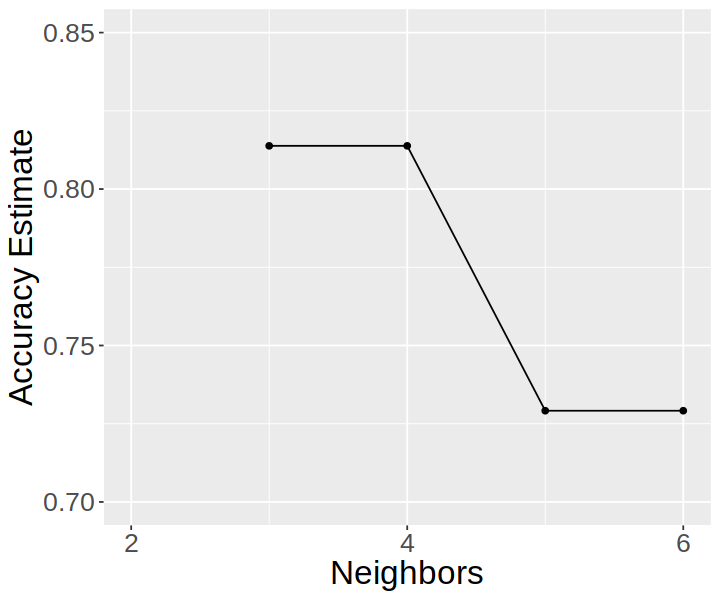

In [15]:
options(repr.plot.height = 5, repr.plot.width = 6)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

mnist_recipe  <- recipe(heart_disease ~ age + chol + thalach + trestbps , data = training_set) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())


mnist_vfold <- vfold_cv(training_set, v = 5, strata = heart_disease)

knn_results <- workflow() |>
                 add_recipe(mnist_recipe) |>
                 add_model(knn_spec) |>
                 tune_grid(resamples = mnist_vfold, grid = tibble(neighbors = c(2,3,4,5,6))) |>
                 collect_metrics()

accuracies <- knn_results |>
                 filter(.metric == 'accuracy')

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 20)) +
                  scale_x_continuous(breaks = seq(0, 20, 2)) +
                  scale_y_continuous(limits = c(0.7, 0.85))

cross_val_plot

In [16]:
mnist_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
       set_engine("kknn") |>
       set_mode("classification")

mnist_fit <- workflow() |>
             add_recipe(mnist_recipe) |>
             add_model(mnist_spec) |>
            fit(data = training_set)
mnist_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(4,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1848958
Best kernel: rectangular
Best k: 4

In [17]:
new_ob <- tibble(age = 50,thalach = 170, chol=140, trestbps=200)
heart_disease_predicted <- predict(mnist_fit,new_ob)
heart_disease_predicted

.pred_class
<fct>
Yes


In [18]:
mnist_predictions <- predict(mnist_fit ,testing_set) |>
      bind_cols(testing_set)

mnist_predictions

.pred_class,age,chol,target,thalach,trestbps,heart_disease
<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>
Yes,58,248,1,122,100,Yes
No,58,318,0,140,114,No
Yes,71,149,1,125,112,Yes
No,43,341,0,136,132,No
Yes,51,308,1,142,140,Yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Yes,42,295,1,162,120,Yes
No,58,318,0,140,114,No
No,65,282,0,174,138,No


In [19]:
prediction_accuracy <- mnist_predictions |>
        metrics(truth = heart_disease, estimate = .pred_class)             

prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8754864
kap,binary,0.7512101


In [29]:
set.seed(9999) 

mnist_metrics <- mnist_predictions |>
  metrics(truth = heart_disease,estimate = .pred_class) |>
filter(.metric=="accuracy")

mnist_conf_mat <- mnist_predictions |>
  conf_mat(truth = heart_disease, estimate = .pred_class)


mnist_metrics
mnist_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8754864


          Truth
Prediction No  Yes
       No  113  20
       Yes  12 112